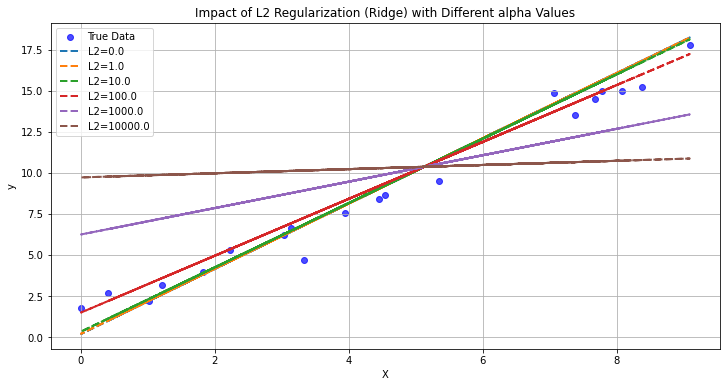

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(0)
X = np.linspace(0, 10, 100)
y = 2 * X + np.random.normal(0, 1, 100)

# Add some outliers
y[5] += 20
y[15] -= 20

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y, test_size=0.2, random_state=42)

# Define a list of alpha values to test
alphas = [0.0, 1.0, 10.0, 100.0, 1000.0, 10000.0]

# Create a figure for the plot
plt.figure(figsize=(12, 6))

# Plot the true data
plt.scatter(X_test, y_test, label='True Data', color='blue', alpha=0.7)

# Iterate over different alpha values and plot the results
for alpha in alphas:
    # Create a Ridge regression model with the current alpha
    ridge_model = Ridge(alpha=alpha)
    
    # Fit the model to the training data
    ridge_model.fit(X_train, y_train)
    
    # Predict on the test data
    ridge_predictions = ridge_model.predict(X_test)
    
    # Plot the results for the current alpha
    plt.plot(X_test, ridge_predictions, label=f'L2={alpha}', linewidth=2, linestyle='dashed')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Impact of L2 Regularization (Ridge) with Different alpha Values')
plt.legend()
plt.grid()
plt.show()

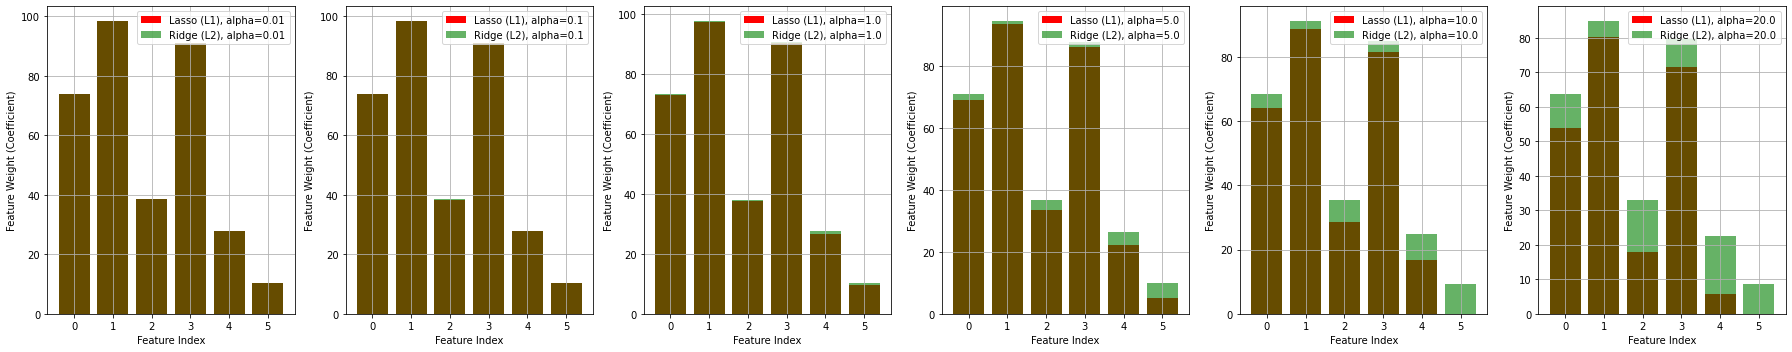

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Generate synthetic data with multiple features
X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=0)

# Standardize the features for better regularization performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define a range of alpha values to test
alphas = [0.01, 0.1, 1.0, 5.0, 10.0, 20.0]

# Create subplots to visualize the impact of alpha on feature weights
plt.figure(figsize=(25, 5))

for i, alpha in enumerate(alphas):
    plt.subplot(1, 6, i + 1)
    
    # Create linear regression models with L1 (Lasso) and L2 (Ridge) regularization
    lasso_model = Lasso(alpha=alpha)
    ridge_model = Ridge(alpha=alpha)

    # Fit the models to the training data
    lasso_model.fit(X_train, y_train)
    ridge_model.fit(X_train, y_train)

    # Get the feature weights (coefficients)
    lasso_weights = lasso_model.coef_
    ridge_weights = ridge_model.coef_

    # Plot the feature weights
    plt.bar(range(len(lasso_weights)), lasso_weights, label=f'Lasso (L1), alpha={alpha}', color='red')
    plt.bar(range(len(ridge_weights)), ridge_weights, label=f'Ridge (L2), alpha={alpha}', color='green', alpha=0.6)
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Weight (Coefficient)')
    plt.legend()
    plt.grid()
    plt.tight_layout()


plt.tight_layout()
plt.show()

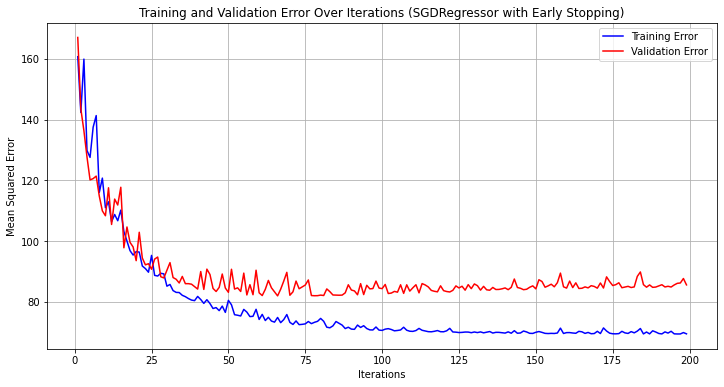

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(0)
X = np.linspace(0, 10, 100)
y = 2 * X + np.random.normal(0, 1, 100) + X*X 

# Add some outliers
y[5] += 20
y[15] -= 20

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y, test_size=0.4, random_state=42)

# Initialize the SGDRegressor without early stopping
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-5, validation_fraction=0.2, n_iter_no_change=5)

# Lists to store training and validation errors
training_errors = []
validation_errors = []

# Iterate over iterations
for iteration in range(1, 200):
    sgd_regressor.partial_fit(X_train, y_train)  # Partial fit to update model with one iteration
    
    # Predict on the training data and calculate training error
    y_train_pred = sgd_regressor.predict(X_train)
    training_mse = mean_squared_error(y_train, y_train_pred)
    training_errors.append(training_mse)

    # Predict on the validation data and calculate validation error
    y_val_pred = sgd_regressor.predict(X_test)
    validation_mse = mean_squared_error(y_test, y_val_pred)
    validation_errors.append(validation_mse)

    # Early stopping: Stop training if validation error increases
    #if iteration > 5 and validation_errors[-1] > validation_errors[-6]:
    #    break

# Plot the training and validation errors over the iterations
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(training_errors) + 1), training_errors, label='Training Error', color='blue')
plt.plot(range(1, len(validation_errors) + 1), validation_errors, label='Validation Error', color='red')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Error Over Iterations (SGDRegressor with Early Stopping)')
plt.legend()
plt.grid()
plt.show()

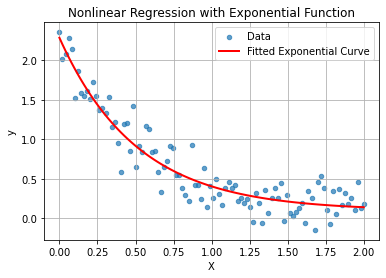

Fitted Parameters (a, b, c): [2.18506426 1.96221854 0.09810814]


In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define an exponential function to fit
def exponential_function(x, a, b, c):
    return a * np.exp(-b * x) + c

# Generate synthetic data with an exponential relationship
np.random.seed(0)
X = np.linspace(0, 2, 100)
y = 2 * np.exp(-1.5 * X) + np.random.normal(0, 0.2, len(X))

# Fit the exponential function to the data using curve_fit
params, covariance = curve_fit(exponential_function, X, y, p0=[1, 1, 1])

# Generate a range of X values for plotting
X_plot = np.linspace(0, 2, 100)
y_plot = exponential_function(X_plot, *params)

# Plot the synthetic data and the fitted exponential curve
plt.scatter(X, y, s=20, label='Data', alpha=0.7)
#plt.plot(X_plot, y_plot, color='red', linewidth=2, label='Fitted Exponential Curve')
plt.xlabel('X')
plt.ylabel('y')
#plt.title('Nonlinear Regression with Exponential Function')
plt.legend()
plt.grid()
plt.show()

# Print the parameters of the fitted exponential curve
print("Fitted Parameters (a, b, c):", params)

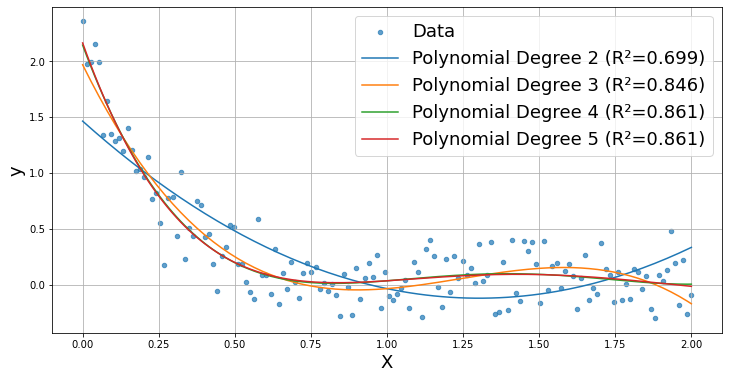

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Define an exponential function to fit
def exponential_function(x, a, b, c):
    return a * np.exp(-b * x) + c

# Generate synthetic data with an exponential relationship
np.random.seed(0)
X = np.linspace(0, 2, 150)
y = 2 * np.exp(-4 * X) + np.random.normal(0, 0.2, len(X))

# Fit the exponential function to the data using curve_fit
params_exp, _ = curve_fit(exponential_function, X, y, p0=[1, 1, 1])

# Generate a range of X values for plotting
X_plot = np.linspace(0, 2, 150)
y_plot_exp = exponential_function(X_plot, *params_exp)

# Plot the synthetic data and the fitted exponential curve
plt.figure(figsize=(12, 6))
plt.scatter(X, y, s=20, label='Data', alpha=0.7)
#plt.plot(X_plot, y_plot_exp, color='red', linewidth=2, label=f'Exponential Curve (R²={r2_score(y, exponential_function(X, *params_exp)):.3f})')

# Fit and plot polynomial curves of different degrees
for degree in range(2, 6):
    coefficients = np.polyfit(X, y, degree)
    polynomial = np.poly1d(coefficients)
    y_plot_poly = polynomial(X_plot)
    plt.plot(X_plot, y_plot_poly, label=f'Polynomial Degree {degree} (R²={r2_score(y, polynomial(X)):.3f})')

plt.xlabel('X', fontsize=18)
plt.ylabel('y', fontsize=18)
#plt.title('Nonlinear Regression with Exponential and Polynomial Functions', fontsize=16)
plt.legend(fontsize=18)
plt.grid()
plt.show()